In [1]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import itertools
import argparse


/scratch/local/2240901/ipykernel_75691/2254304007.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(taxas)


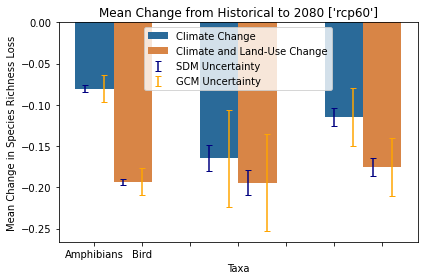

65
['rcp60']
mean_values {'Mammals': [-0.09676302897587863, -0.06380773160899833], 'Amphibians': [-0.22345994074604797, -0.10568276426544004], 'Bird': [-0.14960322613183136, -0.0799499943715789]}
mean_sum_bin_change_taxa {'Mammals': [-0.19228454076538948, -0.1942636951490076], 'Amphibians': [-0.236649286825963, -0.15244432548615064], 'Bird': [-0.19442838937358972, -0.1568057259000343]}
uncertainties_sdm_taxa {'Mammals': [0.0023796177564658033, 0.0052654799487650075], 'Amphibians': [0.01742439770463569, 0.013169092395885037], 'Bird': [0.01478147030436571, 0.007741075790111533]}
uncertainties_gcm_taxa {'Mammals': [0.016475950378704925, 0.015708973628056552, 0.013744201868635827, 0.019981468858363275], 'Amphibians': [0.060625045015644155, 0.05592945934463935, 0.06604323336040244, 0.05295661524052992], 'Bird': [0.02806749445949916, 0.03446214197533961, 0.043715432983830224, 0.03306139410183596]}


<Figure size 432x288 with 0 Axes>

In [93]:
#loss absolute
import pickle
import matplotlib.pyplot as plt
import numpy as np
time=['65'] 
scenario=['rcp60']
# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

with open(os.path.join(output_dir, f"mean_newvalue_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_land_use_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_values_{scenario}_{time}.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_taxa_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change_taxa = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_sdm_taxa_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_sdm_taxa = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_gcm_taxa_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_gcm_taxa = pickle.load(f)
# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time=65 

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
#ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}.png")

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')


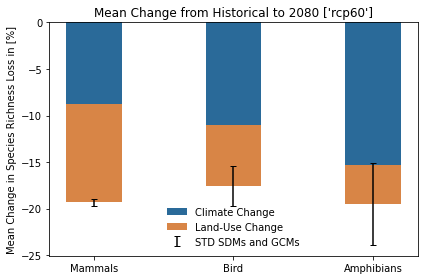

In [159]:
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenario=["rcp60"]
time=['65']
time_ind =65
# Load pickled data

mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            # Load pickle files
            newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")

            with open(newvalue_hist_sum_path, "rb") as f:
                newvalue_hist_sum_taxa = pickle.load(f)

            with open(newvalue_future_sum_path, "rb") as f:
                newvalue_future_sum_taxa = pickle.load(f)

            with open(sum_bin_hist_sum_path, "rb") as f:
                sum_bin_hist_sum_taxa = pickle.load(f)

            with open(sum_bin_future_sum_path, "rb") as f:
                sum_bin_future_sum_taxa = pickle.load(f)

            climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100
            climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100
            land_use_change = climate_land_change - climate_change

            
                            #climate_change_loss = climate_change.where(climate_change < 0)
            climate_land_change_loss = climate_land_change.where(climate_land_change<0)
            climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))
            
            # Avoid division by zero
            non_zero_mask = newvalue_hist_sum_taxa != 0
            climate_change = xr.where(non_zero_mask, (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100, 0)

            non_zero_mask_sum_bin = sum_bin_hist_sum_taxa != 0
            climate_land_change = xr.where(non_zero_mask_sum_bin, (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100, 0)

            # Now handle NaN values or negative values as needed
            climate_land_change_loss = xr.where(climate_land_change < 0, climate_land_change, np.nan)
            climate_change_loss = xr.where((climate_land_change < 0) & (climate_change < 0), climate_change, np.nan)

            # Store mean changes in dictionaries
            mean_newvalue_change[sdm][gcm][taxa] = climate_land_change_loss
            mean_sum_bin_change[sdm][gcm][taxa] = climate_change_loss
            mean_land_use_change[sdm][gcm][taxa] = land_use_change
            
# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    # Calculate the mean values over all SDMs and GCMs
    mean_climate_change = np.mean([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
    mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for climate_change
    std_dev_climate_change = np.std([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for land_use_change
  

    if not i:
        handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
        handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
        handle_error= ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')
       

    else:
        ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
        ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
        ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')
      

# Combine handles and labels for legend
handles.extend([handle_climate_change, handle_land_use_change, handle_error])
labels.extend(['Climate Change', 'Land-Use Change', 'STD SDMs and GCMs'])

# Set plot detailsax.set_ylim(bottom=0, top=np.max(mean_climate_change) + 2 * std_dev_climate_change)
ax.set_xticks(x_positions)
ax.set_xticklabels(taxas)

ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
ax.legend(handles=handles, labels=labels, frameon=False, loc= 'lower center')
  # Assuming '65' is the desired time value

ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

plt.tight_layout()
plt.show()



/software.el7/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/software.el7/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:11

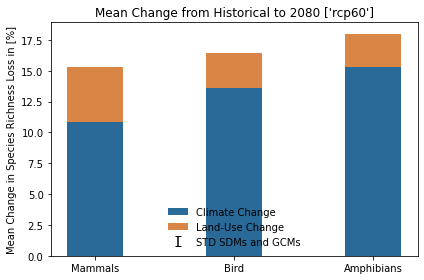

In [239]:
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenario=["rcp60"]
time=['65']
time_ind =65
# Load pickled data

mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            # Load pickle files
            newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")

            with open(newvalue_hist_sum_path, "rb") as f:
                newvalue_hist_sum_taxa = pickle.load(f)

            with open(newvalue_future_sum_path, "rb") as f:
                newvalue_future_sum_taxa = pickle.load(f)

            with open(sum_bin_hist_sum_path, "rb") as f:
                sum_bin_hist_sum_taxa = pickle.load(f)

            with open(sum_bin_future_sum_path, "rb") as f:
                sum_bin_future_sum_taxa = pickle.load(f)

            climate_change= (newvalue_future_sum_taxa - newvalue_hist_sum_taxa)
            climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) 
            land_use_change = climate_land_change - climate_change

            
                            #climate_change_loss = climate_change.where(climate_change < 0)
            climate_land_change_loss = climate_land_change.where(climate_land_change > 0)
            climate_change_loss = climate_change.where((climate_land_change > 0) & (climate_change > 0))
            

            climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100
            climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100
            land_use_change = climate_land_change - climate_change


            # Filter for gains
            threshold =0# Adjust the threshold based on your data characteristics

            climate_land_change_gains = climate_land_change.where(climate_land_change > threshold, drop=True)
            climate_change_gains = climate_change.where((climate_land_change >threshold) & (climate_change > threshold))


            # Store mean changes in dictionaries
            mean_newvalue_change[sdm][gcm][taxa] = climate_change_gains
            mean_sum_bin_change[sdm][gcm][taxa] = climate_land_change_gains
            mean_land_use_change[sdm][gcm][taxa] = land_use_change
            
# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    mean_climate_change = np.nanmean(mean_newvalue_change[sdm][gcm][taxa])

    # Calculate the mean values over all combinations of SDMs and GCMs for climate_land_change_gains and climate_change
    mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa])])


    # Calculate standard deviation or confidence interval for climate_change
    std_dev_climate_change = np.std([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for land_use_change
  

    if not i:
        handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
        handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
        handle_error= ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')
       

    else:
        ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
        ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
        ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')
      

# Combine handles and labels for legend
handles.extend([handle_climate_change, handle_land_use_change, handle_error])
labels.extend(['Climate Change', 'Land-Use Change', 'STD SDMs and GCMs'])

# Set plot detailsax.set_ylim(bottom=0, top=np.max(mean_climate_change) + 2 * std_dev_climate_change)
ax.set_xticks(x_positions)
ax.set_xticklabels(taxas)

ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
ax.legend(handles=handles, labels=labels, frameon=False, loc= 'lower center')
  # Assuming '65' is the desired time value

ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

plt.tight_layout()
plt.show()



In [226]:
mean_value = np.nanmean(climate_change)
median_value = np.nanmedian(climate_change)
std_dev = np.nanstd(climate_change)


In [228]:
mean_climate_change

7.646978891074482

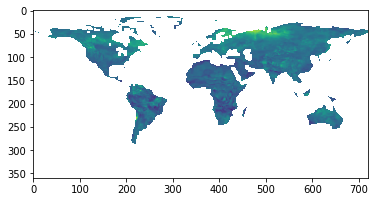

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming climate_change is your DataArray
masked_climate_change = np.ma.masked_where(np.isnan(climate_change), climate_change)

plt.imshow(masked_climate_change)
plt.show()


In [216]:
climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa
climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa


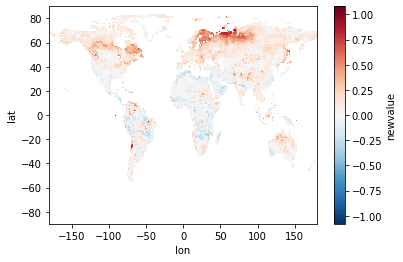

In [220]:
climate_change.plot()

In [215]:
print(newvalue_hist_sum_taxa)
print(newvalue_future_sum_taxa)
print(sum_bin_hist_sum_taxa)
print(sum_bin_future_sum_taxa)



<xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
<xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
<xarray.DataArray 'sum_bin' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0

In [188]:
nan_mask_land_change = np.isnan(climate_land_change)
nan_mask_change = np.isnan(climate_change)
print("NaN values in Climate Land Change:", nan_mask_land_change.any().values)
print("NaN values in Climate Change:", nan_mask_change.any().values)


NaN values in Climate Land Change: False
NaN values in Climate Change: False


In [152]:
newvalue_hist_sum_taxa.max()

<xarray.DataArray 'newvalue' ()>
array(168.55787355)

In [136]:
# After calculating climate_change, climate_land_change, and land_use_change, add the following print statements

print(f"NaN values in climate_change: {np.any(np.isnan(climate_change))}")
print(f"NaN values in climate_land_change: {np.any(np.isnan(climate_land_change))}")
print(f"NaN values in land_use_change: {np.any(np.isnan(land_use_change))}")


NaN values in climate_change: <xarray.DataArray 'newvalue' ()>
array(True)
NaN values in climate_land_change: <xarray.DataArray 'sum_bin' ()>
array(True)
Coordinates:
    time     float64 1.146e+03
NaN values in land_use_change: <xarray.DataArray ()>
array(True)
Coordinates:
    time     float64 1.146e+03


In [117]:
[np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms]

[<xarray.DataArray 'sum_bin' ()>
 array(-0.25797318)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.23792416)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.23861958)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.21208023)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.16610311)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.15467073)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.14379727)
 Coordinates:
     time     float64 1.146e+03,
 <xarray.DataArray 'sum_bin' ()>
 array(-0.14520619)
 Coordinates:
     time     float64 1.146e+03]

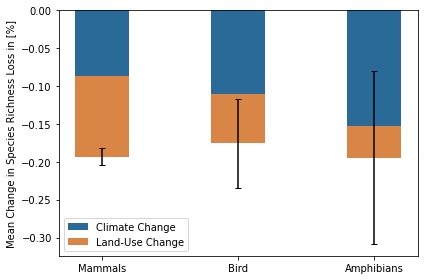

In [110]:
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenario=["rcp60"]
time=['65']
# Load pickled data
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for sdm in sdms:
    mean_newvalue_change[sdm] = {}
    mean_sum_bin_change[sdm] = {}
    mean_land_use_change[sdm] = {}

    for gcm in gcms:
        mean_newvalue_change[sdm][gcm] = {}
        mean_sum_bin_change[sdm][gcm] = {}
        mean_land_use_change[sdm][gcm] = {}

        for taxa in taxas:
            # Load pickle files
            newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
            sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")

            with open(newvalue_hist_sum_path, "rb") as f:
                newvalue_hist_sum_taxa = pickle.load(f)

            with open(newvalue_future_sum_path, "rb") as f:
                newvalue_future_sum_taxa = pickle.load(f)

            with open(sum_bin_hist_sum_path, "rb") as f:
                sum_bin_hist_sum_taxa = pickle.load(f)

            with open(sum_bin_future_sum_path, "rb") as f:
                sum_bin_future_sum_taxa = pickle.load(f)

            climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa 
            climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa
            land_use_change = climate_land_change - climate_change
            
                            #climate_change_loss = climate_change.where(climate_change < 0)
            climate_land_change_loss = climate_land_change.where(climate_land_change<0)
            climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))

            # Store mean changes in dictionaries
            mean_newvalue_change[sdm][gcm][taxa] = climate_land_change_loss
            mean_sum_bin_change[sdm][gcm][taxa] = climate_change_loss
            mean_land_use_change[sdm][gcm][taxa] = land_use_change
            
# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    # Calculate the mean values over all SDMs and GCMs
    mean_climate_change = np.mean([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
    mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for climate_change
    range_climate_change = np.ptp([mean_newvalue_change[sdm][gcm][taxa].mean() for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for land_use_change
  

    if not i:
        handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
        handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
        ax.errorbar(x_shift, mean_climate_change, yerr=range_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')



    else:
        ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
        ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
        ax.errorbar(x_shift, mean_climate_change, yerr=range_climate_change, fmt='none', capsize=3, color='black')
      

# Combine handles and labels for legend
handles.extend([handle_climate_change, handle_land_use_change])
labels.extend(['Climate Change', 'Land-Use Change', 'Uncertainty'])

# Set plot detailsax.set_ylim(bottom=0, top=np.max(mean_climate_change) + 2 * std_dev_climate_change)
ax.set_xticks(x_positions)
ax.set_xticklabels(taxas)
ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
ax.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()



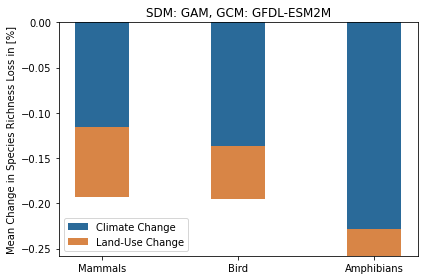

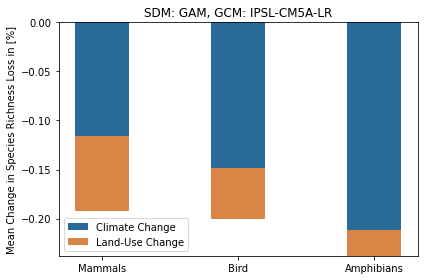

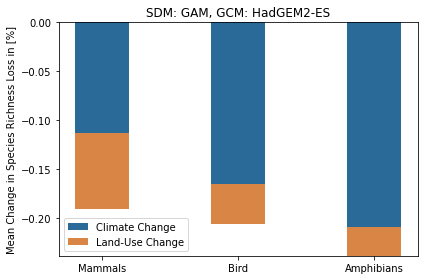

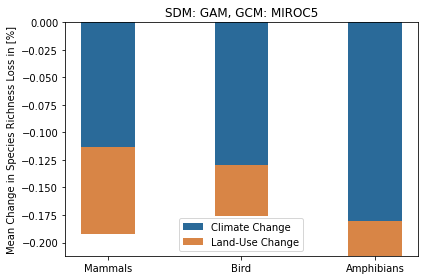

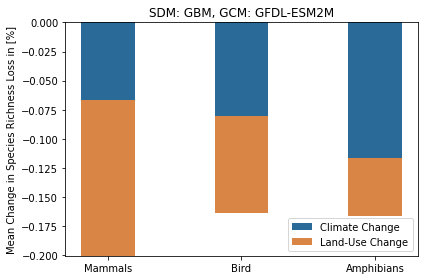

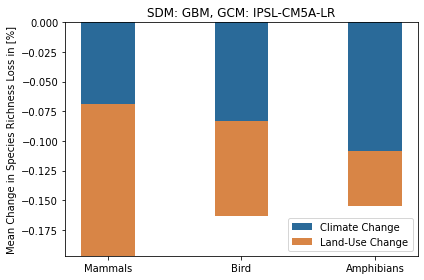

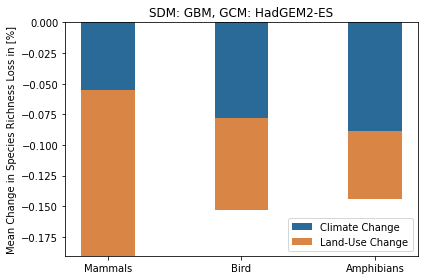

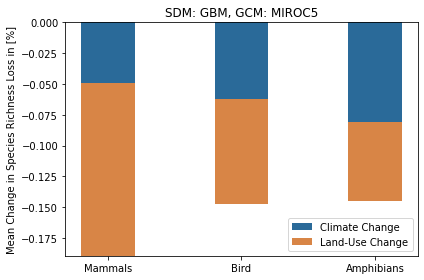

In [105]:
# Rest of your existing code...

# Create separate plots for each combination of SDM and GCM
for sdm in sdms:
    for gcm in gcms:
        # Set up the bar plot
        fig, ax = plt.subplots()

        color_change = "#2a6a99"
        color_land_use_change = "#d88546"

        bar_width = 0.4
        error_bar_shift = 0.1

        x_positions = np.arange(len(taxas))

        # Create a variable to store the handles and labels for the legend
        handles, labels = [], []

        for i, taxa in enumerate(taxas):
            x_shift = x_positions[i]

            # Calculate the mean values for the specific combination of SDM and GCM
            mean_climate_change = np.mean(mean_newvalue_change[sdm][gcm][taxa])
            mean_land_use_change2 = np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa])

            # Calculate standard deviation or confidence interval for climate_change


            if not i:
                handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
                handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')

            else:
                ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
                ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)


        # Combine handles and labels for legend
        handles.extend([handle_climate_change, handle_land_use_change])
        labels.extend(['Climate Change', 'Land-Use Change', 'Uncertainty'])

        # Set plot details
        ax.set_xticks(x_positions)
        ax.set_xticklabels(taxas)
        ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
        ax.legend(handles=handles, labels=labels)

        # Set plot title with the combination of SDM and GCM
        ax.set_title(f"SDM: {sdm}, GCM: {gcm}")

        plt.tight_layout()
        plt.show()


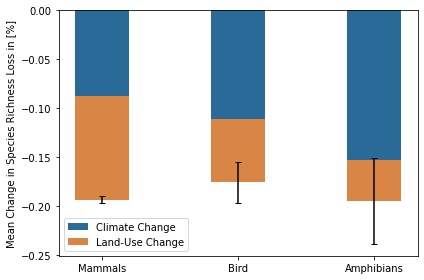

In [101]:
# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    # Calculate the mean values over all SDMs and GCMs
    mean_climate_change = np.mean([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
    mean_land_use_change = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for climate_change
    std_dev_climate_change = np.std([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

    # Calculate standard deviation or confidence interval for land_use_change
  

    if not i:
        handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
        handle_land_use_change = ax.bar(x_shift, mean_land_use_change, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land-Use Change')
        ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='Climate Change Uncertainty')
       

    else:
        ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
        ax.bar(x_shift, mean_land_use_change, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
        ax.errorbar(x_shift, mean_climate_change, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')
      

# Combine handles and labels for legend
handles.extend([handle_climate_change, handle_land_use_change])
labels.extend(['Climate Change', 'Land-Use Change', 'Uncertainty'])

# Set plot details
ax.set_xticks(x_positions)
ax.set_xticklabels(taxas)
ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
ax.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()


In [18]:
[mean_sum_bin_change[taxa][i] - mean_newvalue_change[taxa][i] for i in range(len(mean_newvalue_change[taxa]))] 


KeyError: 'Mammals'

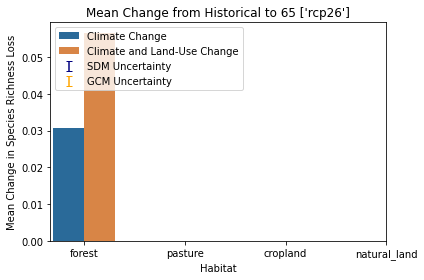

In [15]:
#per habitat instead 
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"
time = ['65']
scenario = ['rcp26']

with open(os.path.join(output_dir, f"mean_newvalue_change_habitat_{scenario}_{time}.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_habitat_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_land_use_change_habitat{scenario}_{time}.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_values_habitat{scenario}_{time}.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_habitat_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change_habitat = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_sdm_habitat_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_sdm_habitat = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_gcm_habitat_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_gcm_habitat = pickle.load(f)

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
habitats = ["forest", "pasture", "cropland", "natural_land"]
time = 65

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(habitats)) * (2 * bar_width + 0.5)

for i, habitat in enumerate(habitats):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[habitat][1:2]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_habitat[habitat][1:2]), width=bar_width, alpha=1,
               color=color_land_use_change, label='Climate and Land-Use Change')
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[habitat][1:2]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values[habitat]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_habitat[habitat]), width=bar_width, alpha=1,
               color=color_land_use_change)
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)

ax.set_xticks(x_positions + bar_width * 0.5)
ax.set_xticklabels(habitats)

ax.set_xlabel('Habitat')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {time} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()


In [10]:
mean_values['forest'][1:2]

[0.030637773419955307]

In [31]:
forest = mean_newvalue_change['GAM']['MIROC5']['forest'].mean()

In [34]:
pasture

<xarray.DataArray 'newvalue' ()>
array(-0.19582133)
Coordinates:
    time     float64 1.146e+03

In [32]:
forest

<xarray.DataArray 'newvalue' ()>
array(-0.19582133)
Coordinates:
    time     float64 1.146e+03

In [33]:
pasture = mean_newvalue_change['GAM']['MIROC5']['pasture'].mean()

In [ ]:
num_species = {
    "Mammals": 3941,
    "Amphibians": 2705,
    "Bird": 7262
}

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time = 65 
scenario = "rcp2.6"
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    num_species_taxa = num_species[taxa]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]) , width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]) , width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]) , width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]) , width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) , yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty)
        


ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_loss_scaled.png")

# Save the plot to the specified filename

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')



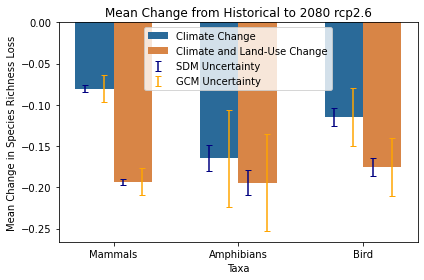

65
rcp2.6
mean_values {'Mammals': [-0.09676302897587863, -0.06380773160899833], 'Amphibians': [-0.22345994074604797, -0.10568276426544004], 'Bird': [-0.14960322613183136, -0.0799499943715789]}
mean_sum_bin_change_taxa {'Mammals': [-0.19228454076538948, -0.1942636951490076], 'Amphibians': [-0.236649286825963, -0.15244432548615064], 'Bird': [-0.19442838937358972, -0.1568057259000343]}
uncertainties_sdm_taxa {'Mammals': [0.0023796177564658033, 0.0052654799487650075], 'Amphibians': [0.01742439770463569, 0.013169092395885037], 'Bird': [0.01478147030436571, 0.007741075790111533]}
uncertainties_gcm_taxa {'Mammals': [0.016475950378704925, 0.015708973628056552, 0.013744201868635827, 0.019981468858363275], 'Amphibians': [0.060625045015644155, 0.05592945934463935, 0.06604323336040244, 0.05295661524052992], 'Bird': [0.02806749445949916, 0.03446214197533961, 0.043715432983830224, 0.03306139410183596]}


<Figure size 432x288 with 0 Axes>

In [30]:
num_species = {
    "Mammals": 3941,
    "Amphibians": 2705,
    "Bird": 7262
}

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time = 65 
scenario = "rcp2.6"
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    num_species_taxa = num_species[taxa]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]) , width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]) , width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]) , width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]) , width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) , yerr= np.mean(uncertainties_sdm_taxa[taxa]) , fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) , yerr= np.mean(uncertainties_gcm_taxa[taxa]) , fmt='none', capsize=3, color=color_gcm_uncertainty)
        


ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_loss_scaled.png")

# Save the plot to the specified filename

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')



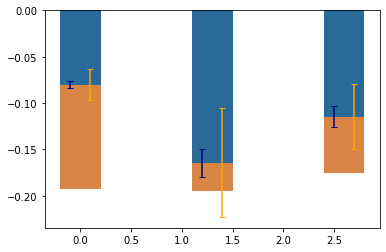

In [33]:


for i,taxa in enumerate(taxas):
    diff_mean_values[taxa] = [mean_sum_bin_change_taxa[taxa][i] - mean_values[taxa][i] for i in range(len(mean_values[taxa]))] 
    diff_mean_sum_bin_change_taxa[taxa] = mean_sum_bin_change_taxa[taxa] 


sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time = 65

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
    ax.bar(x_shift, np.mean(diff_mean_values[taxa]), width=bar_width, color=color_land_use_change, bottom=np.mean(mean_values[taxa]), label='Land-Use Change')

    ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr=np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
    ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr=np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')



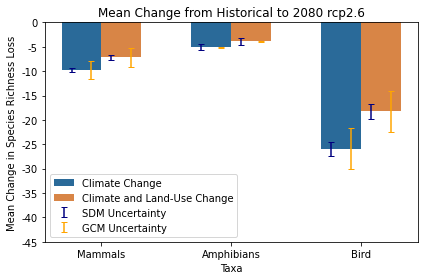

65
rcp2.6
mean_values {'Mammals': [-11.65073549964118, -7.817150876424373], 'Amphibians': [-5.173925252288795, -4.947959775793345], 'Bird': [-30.143587679528128, -21.70941161047007]}
mean_sum_bin_change_taxa {'Mammals': [-7.5016654778255845, -6.841806562986859], 'Amphibians': [-3.841158552799506, -3.9560869543352286], 'Bird': [-19.813512856061838, -16.697237094098462]}
uncertainties_sdm_taxa {'Mammals': [0.45644957214778764, 0.4425378972935083], 'Amphibians': [0.7424971679989129, 0.646872103381155], 'Bird': [1.2907299287039826, 1.627008738660726]}
uncertainties_gcm_taxa {'Mammals': [2.0100693132724805, 1.8932076195777587, 1.7745926403653378, 1.9892996732180328], 'Amphibians': [0.1618962065286378, 0.25550101284751214, 0.019219570572037714, 0.015314163042711826], 'Bird': [4.001401703206238, 4.041253402748703, 4.10264389237078, 4.723053139790398]}


<Figure size 432x288 with 0 Axes>

In [38]:
#loss absolute
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

with open(os.path.join(output_dir, "mean_newvalue_change.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_sum_bin_change.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_land_use_change.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_values.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, "mean_sum_bin_change_taxa.pkl"), "rb") as f:
    mean_sum_bin_change_taxa = pickle.load(f)

with open(os.path.join(output_dir, "uncertainties_sdm_taxa.pkl"), "rb") as f:
    uncertainties_sdm_taxa = pickle.load(f)

with open(os.path.join(output_dir, "uncertainties_gcm_taxa.pkl"), "rb") as f:
    uncertainties_gcm_taxa = pickle.load(f)

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time=65 
scenario="rcp2.6"
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}.png")

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')


In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# Specify scenario and time for the first plot
scenario_1 = ["rcp26"]
time_1 = ['65']
time=65
scenario="rcp2.6"
# Read in the results from the saved pickle files
def load_pickle(file_name, scenario, time):
    file_path = os.path.join(output_dir, file_name.format(scenario=scenario, time=time))
    with open(file_path, "rb") as f:
        return pickle.load(f)

mean_values_1 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_1, time_1)
mean_sum_bin_change_taxa_1 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_sdm_taxa_1 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)
uncertainties_gcm_taxa_1 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_1, time_1)

# Specify scenario and time for the second plot
scenario_2 = ["rcp60"]
time_2 = ['65']

# Read in the results from the saved pickle files for the second plot
mean_values_2 = load_pickle("mean_values_{scenario}_{time}.pkl", scenario_2, time_2)
mean_sum_bin_change_taxa_2 = load_pickle("mean_sum_bin_change_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_sdm_taxa_2 = load_pickle("uncertainties_sdm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)
uncertainties_gcm_taxa_2 = load_pickle("uncertainties_gcm_taxa_{scenario}_{time}.pkl", scenario_2, time_2)

# Set up the bar plots side by side
taxa_list = ["Mammals", "Amphibians", "Bird"]
color_change = "#2a6a99"  # A shade of orange
color_land_use_change = "#d88546"  # A shade of blue
color_sdm_uncertainty = "navy"  # A shade of green
color_gcm_uncertainty = "orange"  # A shade of purple

bar_width = 0.4
error_bar_shift = 0.1

x_positions_1 = np.arange(len(taxa_list)) * (2 * bar_width + 0.5)
x_positions_2 = x_positions_1 + len(taxa_list) * (2 * bar_width + 0.5)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first scenario
ax = axs[0]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_1[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM STD')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_1[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_1[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_sdm_taxa_1[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_1[taxa]), yerr=np.mean(uncertainties_gcm_taxa_1[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions_1 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
#ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP26')
ax.legend()

# Plot for the second scenario
ax = axs[1]
for i, taxa in enumerate(taxa_list):
    x_shift = x_positions_2[i]
    if not i:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM STD')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty,  label='GCM STD')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values_2[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa_2[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_sdm_taxa_2[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa_2[taxa]), yerr=np.mean(uncertainties_gcm_taxa_2[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions_2 + bar_width * 0.5)
ax.set_xticklabels(taxa_list)
#ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to 2080 RCP60')
ax.legend()

plt.tight_layout()
plt.show()# Set up the bar plot
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for scenario in scenarios:
    mean_newvalue_change = {}
    mean_sum_bin_change = {}
    mean_land_use_change = {}

    for sdm in sdms:
        mean_newvalue_change[sdm] = {}
        mean_sum_bin_change[sdm] = {}
        mean_land_use_change[sdm] = {}

        for gcm in gcms:
            mean_newvalue_change[sdm][gcm] = {}
            mean_sum_bin_change[sdm][gcm] = {}
            mean_land_use_change[sdm][gcm] = {}

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_{scenario}_{time}.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_sum_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_sum_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_sum_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_sum_taxa = pickle.load(f)

                climate_change = (newvalue_future_sum_taxa - newvalue_hist_sum_taxa) / newvalue_hist_sum_taxa * 100
                climate_land_change = (sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa) / sum_bin_hist_sum_taxa * 100
                land_use_change = climate_land_change - climate_change

                climate_land_change_loss = climate_land_change.where(climate_land_change < 0)
                climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))

                # Store mean changes in dictionaries
                mean_newvalue_change[sdm][gcm][taxa] = climate_land_change_loss
                mean_sum_bin_change[sdm][gcm][taxa] = climate_change_loss
                mean_land_use_change[sdm][gcm][taxa] = land_use_change

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i] + bar_width if scenario == "rcp26" else x_positions[i]

        # Calculate the mean values over all SDMs and GCMs
        mean_climate_change = np.mean([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
        mean_land_use_change2 = np.mean([np.mean(mean_sum_bin_change[sdm][gcm][taxa] - mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        # Calculate standard deviation or confidence interval for climate_change
        std_dev_climate_change = np.std([np.mean(mean_newvalue_change[sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        # Calculate standard deviation or confidence interval for land_use_change

        if not i:
            handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label=f'Climate Change')

plt.tight_layout()
plt.show()




In [ ]:
#loss absolute
import pickle
import matplotlib.pyplot as plt
import numpy as np
time=['65'] 
scenario=['rcp60']
# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

with open(os.path.join(output_dir, f"mean_newvalue_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_land_use_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_values_{scenario}_{time}.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_taxa_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change_taxa = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_sdm_taxa_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_sdm_taxa = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_gcm_taxa_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_gcm_taxa = pickle.load(f)
# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time=65 

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
#ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}.png")

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')

In [ ]:
#per habitat instead 
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"
time = ['65']
scenario = ['rcp60']

with open(os.path.join(output_dir, f"mean_newvalue_change_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_land_use_change_habitat{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_values_habitat{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_sum_bin_change_habitat = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_sdm_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    uncertainties_sdm_habitat = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_gcm_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    uncertainties_gcm_habitat = pickle.load(f)

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
habitats = ["forest", "pasture", "cropland", "natural_land"]
time = 65

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(habitats)) * (2 * bar_width + 0.5)

for i, habitat in enumerate(habitats):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[habitat]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_habitat[habitat]), width=bar_width, alpha=1,
               color=color_land_use_change, label='Climate and Land-Use Change')
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values[habitat]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_habitat[habitat]), width=bar_width, alpha=1,
               color=color_land_use_change)
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)

ax.set_xticks(x_positions + bar_width * 0.5)
ax.set_xticklabels(habitats)

ax.set_xlabel('Habitat')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {time} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
#loss absolute
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

with open(os.path.join(output_dir, "mean_newvalue_change.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_sum_bin_change.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_land_use_change.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_values.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, "mean_sum_bin_change_taxa.pkl"), "rb") as f:
    mean_sum_bin_change_taxa = pickle.load(f)

with open(os.path.join(output_dir, "uncertainties_sdm_taxa.pkl"), "rb") as f:
    uncertainties_sdm_taxa = pickle.load(f)

with open(os.path.join(output_dir, "uncertainties_gcm_taxa.pkl"), "rb") as f:
    uncertainties_gcm_taxa = pickle.load(f)

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time=65 
scenario="rcp2.6"
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}.png")

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')